# Advanced Analytics Challenge: Marcelo Torres Cisterna

## Importar Librerías Principales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import datetime

# Dataset

In [2]:
df = pd.read_csv('dataset_SCL.csv')

C:\Users\marce\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
df['Emp-O'].unique().shape

(32,)

In [5]:
df.iloc[1]['Fecha-I'].split(' ')

['2017-01-02', '23:30:00']

In [6]:
asdf = datetime.datetime.strptime(df.iloc[1]['Fecha-I'], '%Y-%m-%d %H:%M:%S')

In [7]:
type(asdf)

datetime.datetime

In [8]:
type(df.iloc[1]['Fecha-O'])

str

In [9]:
df['Vlo-O'].unique().shape

(867,)

# Separando las Horas

In [10]:
fechaI = df['Fecha-I'].values
fechaO = df['Fecha-O'].values
horasI = []
horasO = []
fI = []
fO = []
d = fechaI.shape[0]
for i in range(d):
    horasI.append(datetime.datetime.strptime(fechaI[i].split(' ')[1], '%H:%M:%S'))
    horasO.append(datetime.datetime.strptime(fechaO[i].split(' ')[1], '%H:%M:%S'))
    fI.append(datetime.datetime.strptime(fechaO[i].split(' ')[0], '%Y-%m-%d'))
    fO.append(datetime.datetime.strptime(fechaO[i].split(' ')[0], '%Y-%m-%d'))
df['Hora-I'] = horasI
df['Hora-O'] = horasO
df['fI'] = fI
df['fO'] = fO

In [11]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora-I,Hora-O,fI,fO
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:33:00,2017-01-01,2017-01-01
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:39:00,2017-01-02,2017-01-02
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:39:00,2017-01-03,2017-01-03
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:33:00,2017-01-04,2017-01-04
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:28:00,2017-01-05,2017-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1900-01-01 14:55:00,1900-01-01 15:41:00,2017-12-22,2017-12-22
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1900-01-01 14:55:00,1900-01-01 15:11:00,2017-12-25,2017-12-25
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1900-01-01 14:55:00,1900-01-01 15:35:00,2017-12-27,2017-12-27
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1900-01-01 14:55:00,1900-01-01 15:08:00,2017-12-29,2017-12-29


# Synthetic Features

## Temporada Alta

In [12]:
test = df['fI'][9000]
print(datetime.datetime(test.year - 1, 12, 15))
print(datetime.datetime(test.year, 3, 3))
print(datetime.datetime(test.year, 12, 15))
print(datetime.datetime(test.year + 1, 3, 3))
print(datetime.datetime(test.year, 7, 15))
print(datetime.datetime(test.year, 7, 31))
print(datetime.datetime(test.year, 9, 11))
print(datetime.datetime(test.year, 9, 30))
if ((test >= datetime.datetime(test.year - 1, 12, 15)) & (test <= datetime.datetime(test.year, 3, 3))):
    print("Intervalo 1")
elif ((test >= datetime.datetime(test.year, 12, 15)) & (test <= datetime.datetime(test.year+1, 3, 3))):
    print("Intervalo 2")
elif ((test >= datetime.datetime(test.year, 7, 15)) & (test <= datetime.datetime(test.year, 7, 31))):
    print("Intervalo 3")
elif ((test >= datetime.datetime(test.year, 9, 11)) & (test <= datetime.datetime(test.year, 9, 30))):
    print("Intervalo 4")
else:
    print('Temporada Baja')

2016-12-15 00:00:00
2017-03-03 00:00:00
2017-12-15 00:00:00
2018-03-03 00:00:00
2017-07-15 00:00:00
2017-07-31 00:00:00
2017-09-11 00:00:00
2017-09-30 00:00:00
Intervalo 1


In [13]:
total = df.shape[0]

In [14]:
temporada_alta = []
for i in range(total):
    data = df['fI'][i]
    if ((data >= datetime.datetime(data.year - 1, 12, 15)) & (data <= datetime.datetime(data.year, 3, 3))):
        temporada_alta.append(1)
    elif ((data >= datetime.datetime(data.year, 12, 15)) & (data <= datetime.datetime(data.year+1, 3, 3))):
        temporada_alta.append(1)
    elif ((data >= datetime.datetime(data.year, 7, 15)) & (data <= datetime.datetime(data.year, 7, 31))):
        temporada_alta.append(1)
    elif ((data >= datetime.datetime(data.year, 9, 11)) & (data <= datetime.datetime(data.year, 9, 30))):
        temporada_alta.append(1)
    else:
        temporada_alta.append(0)

In [15]:
df['temporada_alta'] = temporada_alta

# Dif Min y Atrasos

In [16]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora-I,Hora-O,fI,fO,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:33:00,2017-01-01,2017-01-01,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:39:00,2017-01-02,2017-01-02,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:39:00,2017-01-03,2017-01-03,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:33:00,2017-01-04,2017-01-04,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:28:00,2017-01-05,2017-01-05,1


In [17]:
test = df.iloc[9]
if (test['Fecha-I'] <= test['Fecha-O']):
    print(int((test['Hora-O'] - test['Hora-I']).seconds/60))
else:
    print(int((test['Hora-I'] - test['Hora-O']).seconds/60))

69


In [18]:
dif_min = []
atraso_15 = []
for i in range(total):
    data = df.iloc[i]
    if (data['Fecha-I'] <= data['Fecha-O']):
        a = int((data['Hora-O'] - data['Hora-I']).seconds/60)
        dif_min.append(a)
        if a <15:
            atraso_15.append(0)
        else:
            atraso_15.append(1)
    else:
        a = int((data['Hora-I'] - data['Hora-O']).seconds/60)
        dif_min.append(a)
        if a <15:
            atraso_15.append(0)
        else:
            atraso_15.append(1)
df['dif_min'] = dif_min
df['atraso_15'] = atraso_15

In [19]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,OPERA,SIGLAORI,SIGLADES,Hora-I,Hora-O,fI,fO,temporada_alta,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:33:00,2017-01-01,2017-01-01,1,3,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:39:00,2017-01-02,2017-01-02,1,9,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:39:00,2017-01-03,2017-01-03,1,9,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:33:00,2017-01-04,2017-01-04,1,3,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:28:00,2017-01-05,2017-01-05,1,2,0


In [20]:
df.iloc[4]['Hora-I'].time() < df.iloc[4]['Hora-O'].time()

False

In [21]:
(df.iloc[0]['Hora-O'] - df.iloc[0]['Hora-I']).seconds

180

In [22]:
a = df.iloc[0]['Hora-I']

In [23]:
b = datetime.datetime(1900, 1, 1,23,33)

In [24]:
b

datetime.datetime(1900, 1, 1, 23, 33)

In [25]:
a

Timestamp('1900-01-01 23:30:00')

In [26]:
(b-a).seconds

180

In [27]:
if (a<b):
    print("Hora antes")

Hora antes


# Periodo Día

In [28]:
b = df['Hora-I'].iloc[80]

In [29]:
b

Timestamp('1900-01-01 13:35:00')

In [30]:
a

Timestamp('1900-01-01 23:30:00')

In [31]:
if (a<b):
    print("Hora antes")

In [32]:
periodo_dia = []
for i in range(total):
    data = df['Hora-I'][i]
    if ((data >= datetime.datetime(1900, 1, 1,5,0)) & (data <= datetime.datetime(1900, 1, 1,11,59))):
        periodo_dia.append('mañana')
    elif ((data >= datetime.datetime(1900,1,1,12,0)) & (data <= datetime.datetime(1900, 1, 1, 18,59))):
        periodo_dia.append('tarde')
    else:
        periodo_dia.append('noche')

In [33]:
(datetime.datetime(1900, 1, 1,11,59) - datetime.datetime(1900, 1, 1,5,0))

datetime.timedelta(seconds=25140)

In [34]:
df['periodo_dia'] = periodo_dia

In [35]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,SIGLAORI,SIGLADES,Hora-I,Hora-O,fI,fO,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:33:00,2017-01-01,2017-01-01,1,3,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:39:00,2017-01-02,2017-01-02,1,9,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:39:00,2017-01-03,2017-01-03,1,9,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:33:00,2017-01-04,2017-01-04,1,3,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:28:00,2017-01-05,2017-01-05,1,2,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,Santiago,Lima,1900-01-01 14:55:00,1900-01-01 15:41:00,2017-12-22,2017-12-22,1,46,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,Santiago,Lima,1900-01-01 14:55:00,1900-01-01 15:11:00,2017-12-25,2017-12-25,1,16,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,Santiago,Lima,1900-01-01 14:55:00,1900-01-01 15:35:00,2017-12-27,2017-12-27,1,40,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,Santiago,Lima,1900-01-01 14:55:00,1900-01-01 15:08:00,2017-12-29,2017-12-29,1,13,0,tarde


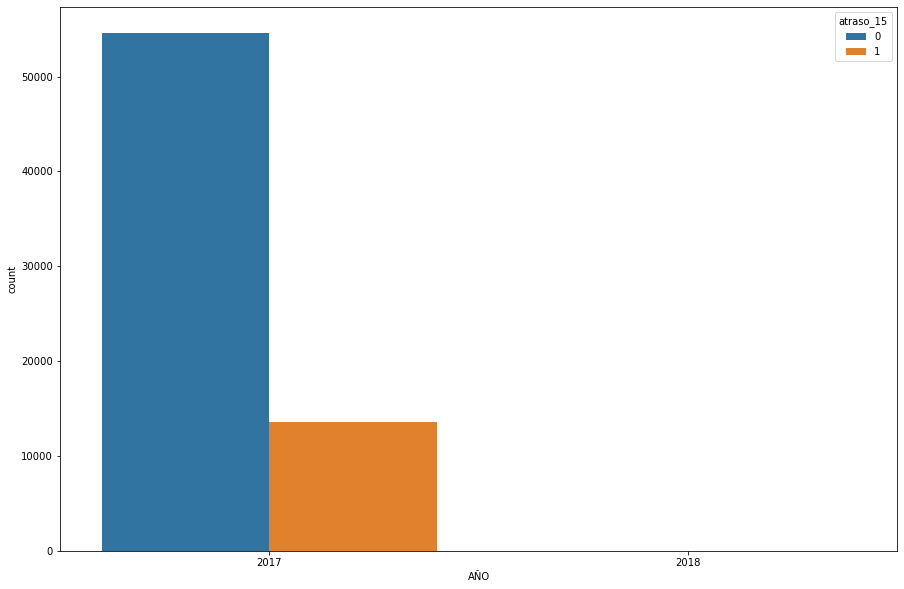

In [36]:
plt.figure(figsize = (15,10))
sns.countplot(x='AÑO' , hue = 'atraso_15', data = df)

## Revisar si las Aerolíneas son Iguales

In [37]:
a = df[['Emp-I' , 'Emp-O']]

In [38]:
a.values[0][0] == a.values[0][1]

True

In [39]:
for i in range(total):
    if(a.values[i][0] != a.values[i][1]):
        print(i)

345
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
897
898
899
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489


6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324


12407
12408
12409
12410
12411
12412
12413
12414
12415
12416
12417
12418
12419
12420
12421
12422
12423
12424
12425
12426
12427
12428
12429
12430
12431
12432
12433
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
1471

20258
20259
20260
20261
20262
20263
20264
20265
20266
20267
20268
20269
20270
20271
20272
20273
20274
20275
20276
20277
20278
20279
20280
20281
20282
20283
20284
20285
20286
20287
20288
20289
20290
20291
20292
20293
20294
20295
20296
20297
20298
20299
20300
20301
20302
20303
20304
20305
20306
20307
20308
20309
20310
20311
20312
20313
20314
20315
20316
20317
20318
20319
20320
20321
20322
20323
20324
20325
20326
20327
20328
20329
20330
20331
20332
20333
20334
20335
20336
20337
20338
20339
20340
20341
20342
20343
20344
20345
20346
20347
20348
20349
20350
20351
20352
20353
20354
20355
20356
20357
20358
20359
20360
20361
20362
20363
20364
20365
20366
20367
20368
20369
20370
20371
20372
20373
20374
20375
20376
20377
20378
20379
20380
20381
20382
20383
20384
20385
20386
20387
20388
20389
20390
20391
20392
20393
20394
20395
20396
20397
20398
20399
20400
20401
20402
20403
20404
20405
20406
20407
20408
20409
20410
20411
20412
20413
20414
20415
20416
20417
20418
20419
20420
20421
20422
20423
2042

26030
26031
26032
26033
26034
26035
26036
26037
26038
26039
26040
26041
26042
26043
26044
26045
26046
26047
26048
26049
26050
26051
26052
26053
26054
26055
26056
26057
26058
26059
26060
26061
26062
26063
26064
26065
26066
26067
26068
26069
26070
26071
26072
26073
26074
26075
26076
26077
26078
26079
26080
26081
26082
26083
26084
26085
26086
26087
27092
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
27107
27108
27109
27110
27111
27112
27113
27114
27115
27116
27117
27118
27119
27120
27121
27122
27123
27124
27125
27126
27127
27128
27129
27130
27131
27132
27133
27134
27135
27136
27137
27138
27139
27140
27141
27142
27143
27144
27145
27146
27147
27148
27149
27150
27151
27152
27153
27154
27155
27156
27157
27158
27159
27160
27161
27162
27163
27164
27165
27166
27167
27168
27169
27170
27171
27172
27173
27174
27175
27177
27178
27179
27180
27181
27182
27183
27184
27185
27186
27187
27188
27189
27190
27191
27192
27193
27194
27195
27196
27197
27198
27199
27200
27201
27202
27203
2720

33239
33240
33241
33242
33243
33244
33245
33246
33247
33248
33249
33250
33251
33252
33253
33254
33255
33256
33257
33258
33259
33260
33261
33262
33263
33264
33265
33266
33267
33268
33269
33270
33271
33272
33273
33274
33275
33276
33277
33278
33279
33280
33281
33282
33283
35599
35600
35601
35602
35603
35604
35605
35606
35607
35608
35609
35610
35611
35612
35613
35614
35615
35616
35617
35618
35619
35620
35621
35622
35623
35624
35625
35626
35627
35628
35629
35630
35631
35632
35633
35634
35635
35636
35637
35638
35639
35640
35641
35642
35643
35644
35645
35646
35647
35648
35649
35650
35651
35652
35653
35654
35655
35656
35657
35658
35659
35660
35661
35662
35663
35664
35665
35666
35667
35668
35669
35670
35671
35672
35673
35674
35675
35676
35677
35678
35679
35680
35681
35682
35683
35684
35685
35686
35687
35688
35689
35690
35691
35692
35693
35694
35695
35696
35697
35698
35699
35700
35701
35702
35703
35704
35705
35706
35707
35708
35709
35710
35711
35712
35713
35714
35715
35716
35717
35718
35719
3572

41469
41470
41471
41472
41473
41474
41475
41476
41477
41478
41479
41480
41481
41482
41483
41484
41485
41486
41487
41488
41489
41490
41491
41492
41493
41494
41495
41496
41497
41498
41499
41500
41501
41502
41503
41504
41505
41506
41507
41508
41509
41510
41511
41512
41513
41514
41515
41516
41517
41518
41519
41520
41521
41522
41523
41524
41525
41526
41527
41528
41529
41530
41531
41532
41533
41534
41535
41536
41537
41538
41539
41540
41541
41542
41543
41544
41545
41546
41547
41548
41549
41550
41551
41552
41553
41554
41555
41556
41557
41558
41559
41560
41561
41562
41563
41564
41565
41566
41567
41568
41569
41570
41571
41572
41573
41574
41575
41576
41577
41578
41579
41580
41581
41582
41583
41584
41585
41586
41587
41588
41589
41590
41591
41592
41593
41594
41595
41596
41597
41598
41599
41600
41601
41602
41603
41604
41605
41606
41607
41608
41609
41610
41611
41612
41613
41614
41615
41616
41617
41618
41619
41620
41621
41622
41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
4163

47533
47534
47535
47536
47537
47538
47539
47540
47541
47542
47543
47544
47545
47546
47547
47548
47549
47550
47551
47552
47553
47554
47555
47556
47557
47558
47559
47560
47561
47562
47563
47564
47565
47566
47567
47568
47569
47570
47571
47572
47573
47574
47575
47576
47577
47578
47579
47580
47581
47582
47583
47584
47585
47586
47587
47588
47589
47590
47591
47592
47593
47594
47595
47596
47597
47598
47599
47600
47601
47602
47603
47604
47605
47606
47607
47608
47609
47610
47611
47612
47613
47614
47615
47616
47617
47618
47619
47620
47621
47622
47623
47624
47625
47626
47627
47628
47629
47630
47631
47632
47633
47634
47635
47636
47637
47638
47639
47640
47641
47642
47643
47644
47645
47646
47647
47648
47649
47650
47651
47652
47653
47654
47655
47656
47657
47658
47659
47660
47661
47662
47663
47664
47665
47666
47667
47668
47669
47670
47671
47672
47673
47674
47675
47676
47677
47678
47679
47680
47681
47682
47683
47684
47685
47686
47687
47688
47689
47690
47691
47692
47693
47694
47695
47696
47697
47698
4769

55096
55097
55098
55099
55100
55101
55102
55103
55104
55105
55106
55107
55108
55109
55110
55111
55112
55113
55114
55115
55116
55117
55118
55119
55120
55121
55122
55123
55124
55125
55126
55127
55128
55129
55130
55131
55132
55133
55134
55135
55136
55137
55138
55139
55147
55148
55149
55150
55151
55152
55153
55154
55155
55156
55157
55158
55159
55160
55161
55162
55163
55164
55165
55166
55167
55168
55169
55170
55171
55172
55173
55174
55175
55176
55177
55178
55179
55180
55181
55182
55183
55184
55185
55186
55187
55188
55189
55190
55191
55192
55193
55194
55195
55196
55197
55198
55199
55200
55201
55202
55203
55204
55205
55206
55207
55208
55209
55210
55211
55212
55213
55214
55215
55216
55217
55218
55219
55220
55221
55222
55223
55224
55225
55226
55227
55228
55229
55230
55231
55232
55233
55234
55235
55236
55237
55238
55239
55240
55241
55242
55243
55244
55245
55246
55247
55248
55249
55250
55251
55252
55253
55254
55255
55256
55257
55258
55259
55260
55261
55262
55263
55264
55265
55266
55267
55268
5526

61280
61281
61282
61283
61284
61285
61286
61287
61288
61289
61290
61291
61292
61293
61294
61295
61296
61297
61298
61299
61300
61301
61302
61303
61304
61305
61306
61307
61308
61309
61310
61311
61312
61313
61314
61315
61316
61317
61318
61319
61320
61321
61322
61323
61324
61325
61326
61327
61328
61329
61330
61331
61332
61333
61334
61335
61336
61337
61338
61339
61340
61341
61342
61343
61344
61345
61346
61347
61348
61349
61350
61351
61352
61353
61355
61356
61357
61358
61359
61360
61361
61362
61363
61364
61365
61366
61367
61368
61369
61370
61371
61372
61373
61374
61375
61376
61377
61378
61379
61380
61381
61382
61383
61384
61385
61386
61387
61388
61389
61390
61391
61392
61393
61394
61395
61396
61397
61398
61399
61400
61401
61402
61403
61404
61405
61406
61407
61408
61409
61410
61411
61412
61413
61414
61415
61416
61417
61418
61419
61420
61421
61422
61423
61424
61425
61431
61432
61433
61434
61435
61436
61437
61438
61439
61440
61441
61442
61443
61444
61445
61446
61447
61448
61449
61450
61451
6145

In [40]:
a.iloc[814]

Emp-I    AVA
Emp-O    LRC
Name: 814, dtype: object

In [41]:
b = df[['Des-I' , 'Des-O']]

In [42]:
for i in range(total):
    if(b.values[i][0] != b.values[i][1]):
        print(i)

1397
7290
7520
8456
12787
12823
16169
16937
18293
20444
24569
25419
25422
25492
33166
37162
38094
38135
38136
39265
42112
55144
61463
62651
67599
67600
67601
67697


In [43]:
b.iloc[67697]

Des-I    SARI
Des-O    SBFI
Name: 67697, dtype: object

In [44]:
df.iloc[67697]

Fecha-I           2017-12-16 02:45:00
Vlo-I                            1261
Ori-I                            SCEL
Des-I                            SARI
Emp-I                             LAN
Fecha-O           2017-12-16 02:43:00
Vlo-O                            1261
Ori-O                            SCEL
Des-O                            SBFI
Emp-O                             LAN
DIA                                16
MES                                12
AÑO                              2017
DIANOM                         Sabado
TIPOVUELO                           I
OPERA                     Grupo LATAM
SIGLAORI                     Santiago
SIGLADES             Cataratas Iguacu
Hora-I            1900-01-01 02:45:00
Hora-O            1900-01-01 02:43:00
fI                2017-12-16 00:00:00
fO                2017-12-16 00:00:00
temporada_alta                      1
dif_min                             2
atraso_15                           0
periodo_dia                     noche
Name: 67697,

In [45]:
df.set_index('Des-O').loc['SBFI']

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Emp-O,DIA,...,SIGLAORI,SIGLADES,Hora-I,Hora-O,fI,fO,temporada_alta,dif_min,atraso_15,periodo_dia
Des-O,,,,,,,,,,,,,,,,,,,,,
SBFI,2017-01-03 07:15:00,9782,SCEL,SBFI,TAM,2017-01-03 07:20:00,9782,SCEL,TAM,3,...,Santiago,Cataratas Iguacu,1900-01-01 07:15:00,1900-01-01 07:20:00,2017-01-03,2017-01-03,1,5,0,mañana
SBFI,2017-12-16 02:45:00,1261,SCEL,SARI,LAN,2017-12-16 02:43:00,1261,SCEL,LAN,16,...,Santiago,Cataratas Iguacu,1900-01-01 02:45:00,1900-01-01 02:43:00,2017-12-16,2017-12-16,1,2,0,noche


In [46]:
b.iloc[25419]

Des-I    SCBA
Des-O    SCTE
Name: 25419, dtype: object

In [47]:
df.iloc[25419]

Fecha-I           2017-05-09 08:30:00
Vlo-I                             271
Ori-I                            SCEL
Des-I                            SCBA
Emp-I                             LAN
Fecha-O           2017-05-09 08:31:00
Vlo-O                             271
Ori-O                            SCEL
Des-O                            SCTE
Emp-O                             LXP
DIA                                 9
MES                                 5
AÑO                              2017
DIANOM                         Martes
TIPOVUELO                           N
OPERA                     Grupo LATAM
SIGLAORI                     Santiago
SIGLADES                 Puerto Montt
Hora-I            1900-01-01 08:30:00
Hora-O            1900-01-01 08:31:00
fI                2017-05-09 00:00:00
fO                2017-05-09 00:00:00
temporada_alta                      0
dif_min                             1
atraso_15                           0
periodo_dia                    mañana
Name: 25419,

In [48]:
df.set_index('Des-O').loc['SCTE'].head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Emp-O,DIA,...,SIGLAORI,SIGLADES,Hora-I,Hora-O,fI,fO,temporada_alta,dif_min,atraso_15,periodo_dia
Des-O,,,,,,,,,,,,,,,,,,,,,
SCTE,2017-01-01 11:30:00,1,SCEL,SCTE,SKU,2017-01-01 11:25:00,1,SCEL,SKU,1,...,Santiago,Puerto Montt,1900-01-01 11:30:00,1900-01-01 11:25:00,2017-01-01,2017-01-01,1,5,0,mañana
SCTE,2017-01-02 08:55:00,1,SCEL,SCTE,SKU,2017-01-02 08:56:00,1,SCEL,SKU,2,...,Santiago,Puerto Montt,1900-01-01 08:55:00,1900-01-01 08:56:00,2017-01-02,2017-01-02,1,1,0,mañana
SCTE,2017-01-03 08:55:00,1,SCEL,SCTE,SKU,2017-01-03 08:55:00,1,SCEL,SKU,3,...,Santiago,Puerto Montt,1900-01-01 08:55:00,1900-01-01 08:55:00,2017-01-03,2017-01-03,1,0,0,mañana
SCTE,2017-01-04 08:55:00,1,SCEL,SCTE,SKU,2017-01-04 08:53:00,1,SCEL,SKU,4,...,Santiago,Puerto Montt,1900-01-01 08:55:00,1900-01-01 08:53:00,2017-01-04,2017-01-04,1,2,0,mañana
SCTE,2017-01-05 08:55:00,1,SCEL,SCTE,SKU,2017-01-05 08:52:00,1,SCEL,SKU,5,...,Santiago,Puerto Montt,1900-01-01 08:55:00,1900-01-01 08:52:00,2017-01-05,2017-01-05,1,3,0,mañana


In [49]:
df.set_index('Des-O').loc['SCBA'].head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Emp-O,DIA,...,SIGLAORI,SIGLADES,Hora-I,Hora-O,fI,fO,temporada_alta,dif_min,atraso_15,periodo_dia
Des-O,,,,,,,,,,,,,,,,,,,,,
SCBA,2017-01-02 13:30:00,17,SCEL,SCBA,SKU,2017-01-02 13:23:00,17,SCEL,SKU,2,...,Santiago,Balmaceda,1900-01-01 13:30:00,1900-01-01 13:23:00,2017-01-02,2017-01-02,1,7,0,tarde
SCBA,2017-01-04 13:30:00,17,SCEL,SCBA,SKU,2017-01-04 13:39:00,17,SCEL,SKU,4,...,Santiago,Balmaceda,1900-01-01 13:30:00,1900-01-01 13:39:00,2017-01-04,2017-01-04,1,9,0,tarde
SCBA,2017-01-06 12:15:00,17,SCEL,SCBA,SKU,2017-01-06 12:19:00,17,SCEL,SKU,6,...,Santiago,Balmaceda,1900-01-01 12:15:00,1900-01-01 12:19:00,2017-01-06,2017-01-06,1,4,0,tarde
SCBA,2017-01-08 12:35:00,17,SCEL,SCBA,SKU,2017-01-08 12:30:00,17,SCEL,SKU,8,...,Santiago,Balmaceda,1900-01-01 12:35:00,1900-01-01 12:30:00,2017-01-08,2017-01-08,1,5,0,tarde
SCBA,2017-01-09 13:30:00,17,SCEL,SCBA,SKU,2017-01-09 13:29:00,17,SCEL,SKU,9,...,Santiago,Balmaceda,1900-01-01 13:30:00,1900-01-01 13:29:00,2017-01-09,2017-01-09,1,1,0,tarde


In [50]:
df[['Des-O' , 'SIGLADES']].drop_duplicates()

,Des-O,SIGLADES
0,KMIA,Miami
48,KDFW,Dallas
79,SAEZ,Buenos Aires
109,CYYZ,Toronto
138,LFPG,Paris
...,...,...
55363,SPSO,"Pisco, Peru"
61210,SAWH,Ushuia
61213,EGYP,Puerto Stanley
64297,SULS,Punta del Este


In [51]:
c = df[['Emp-I' , 'Emp-O']]

In [52]:
c

,Emp-I,Emp-O
0,AAL,AAL
1,AAL,AAL
2,AAL,AAL
3,AAL,AAL
4,AAL,AAL
...,...,...
68201,JAT,JAT
68202,JAT,JAT
68203,JAT,JAT
68204,JAT,JAT


In [53]:
for i in range(total):
    if(c.values[i][0] != c.values[i][1]):
        print(i)

345
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
897
898
899
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489


9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477


14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
14843
14844
14845
14846
14847
14848
14849
14850
14851
14852
14853
14854
14855
1485

20496
20497
20498
20499
20500
20501
20502
20503
20504
20505
20506
20507
20508
20509
20510
20511
20512
20513
20514
20515
20516
20517
20518
20519
20520
20521
20522
20523
20524
20525
20526
20527
20528
20529
20530
20531
20532
20533
20534
20535
20536
20537
20538
20539
20540
20541
20542
20543
20544
20545
20546
20547
20548
20549
20550
20551
20552
20553
20554
20555
20556
20557
20558
20559
20560
20561
20562
20563
20564
20565
20566
20567
20568
20569
20570
20571
20572
20573
20574
20575
20576
20577
20578
20579
20580
20581
20582
20583
20584
20585
20586
20587
20588
20589
20590
20591
20592
20593
20594
20595
20596
20597
20598
20599
20600
20601
20602
20603
20604
20605
20606
20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
20619
20620
20621
20622
20623
20624
20625
20626
20627
20628
20629
20630
20631
20632
20633
20634
20635
20636
20637
20638
20639
20640
20641
20642
20643
20644
20645
20646
20647
20648
20649
20650
20651
20652
20653
20654
20655
20656
20657
20658
20659
20660
20661
2066

27234
27235
27236
27237
27238
27239
27240
27241
27242
27243
27245
27261
27262
27263
27264
27265
27266
27267
27268
27269
27270
27271
27272
27273
27274
27275
27276
27277
27278
27279
27280
27281
27282
27283
27284
27285
27286
27287
27288
27289
27290
27291
27292
27293
27294
27295
27296
27297
27298
27299
27300
27301
27302
27303
27304
27305
27306
27307
27308
27309
27310
27311
27312
27313
27314
27315
27316
27317
27318
27319
27320
27321
27322
27323
27324
27325
27326
27327
27328
27329
27330
27331
27332
27333
27334
27335
27336
27337
27338
27339
27340
27341
27342
27343
27344
27345
27346
27347
27348
27349
27350
27351
27352
27353
27354
27355
27356
27357
27358
27359
27360
27361
27362
27363
27364
27365
27366
27367
27368
27369
27370
27371
27372
27373
27374
27375
27376
27377
27378
27379
27380
27381
27382
27383
27384
27385
27386
27387
27388
27389
27390
27391
27392
27393
27394
27395
27396
27397
27398
27399
27400
27401
27402
27403
27404
27405
27406
27407
27408
28137
28138
28139
28140
28141
28142
28143
2814

35599
35600
35601
35602
35603
35604
35605
35606
35607
35608
35609
35610
35611
35612
35613
35614
35615
35616
35617
35618
35619
35620
35621
35622
35623
35624
35625
35626
35627
35628
35629
35630
35631
35632
35633
35634
35635
35636
35637
35638
35639
35640
35641
35642
35643
35644
35645
35646
35647
35648
35649
35650
35651
35652
35653
35654
35655
35656
35657
35658
35659
35660
35661
35662
35663
35664
35665
35666
35667
35668
35669
35670
35671
35672
35673
35674
35675
35676
35677
35678
35679
35680
35681
35682
35683
35684
35685
35686
35687
35688
35689
35690
35691
35692
35693
35694
35695
35696
35697
35698
35699
35700
35701
35702
35703
35704
35705
35706
35707
35708
35709
35710
35711
35712
35713
35714
35715
35716
35717
35718
35719
35720
35721
35722
35723
35724
35725
35726
35727
35728
35729
35730
35731
35732
35733
35734
35735
35736
35737
35738
35739
35740
35741
35742
35743
35744
35745
35746
35747
35748
35749
35750
35751
35752
35753
35754
35755
35756
35757
35758
35759
35760
35761
35762
35763
35764
3576

41873
41874
41875
41876
41877
41878
41879
41880
41881
41882
41883
41884
41885
41886
41887
41888
41889
41890
41891
41892
41893
41894
41895
41896
41897
41898
41899
41900
41901
41902
41903
41904
41905
41906
41907
41908
41909
41910
41911
41912
41913
41914
41915
41916
41917
41918
41919
41920
41921
41922
41923
41924
41925
41926
41927
41928
41929
41930
41931
41932
41933
41934
41935
41936
41937
41938
41939
41940
41941
41942
41943
41944
41945
41946
41947
41948
41949
41950
41951
41952
41953
41954
41955
41956
41957
41958
41959
41960
41961
41962
41963
41964
41965
41966
41967
41968
41969
41970
41971
41972
41973
41974
41975
41976
41977
41978
41979
41980
41981
41982
41983
41984
41985
41986
41987
41988
41989
41990
41991
41992
41993
41994
41995
41996
41997
41998
41999
42000
42001
42002
42003
42004
42005
42006
42007
42008
42009
42010
42011
42012
42013
42014
42015
42016
42017
42018
42019
42020
42021
42022
42023
42024
42025
42026
42027
42028
42029
42030
42031
42032
42033
42034
42035
42036
42037
42038
4203

48227
48228
48229
48230
48231
48232
48233
48234
48235
48236
49249
49250
49251
49252
49253
49254
49255
49256
49257
49258
49259
49260
49261
49262
49263
49264
49265
49266
49267
49268
49269
49270
49271
49272
49273
49274
49275
49276
49277
49278
49279
49280
49281
49282
49283
49284
49285
49286
49287
49288
49289
49290
49291
49292
49293
49294
49295
49296
49297
49298
49299
49300
49301
49302
49303
49304
49305
49306
49307
49308
49309
49310
49311
49312
49313
49314
49315
49316
49317
49318
49319
49320
49321
49322
49323
49324
49325
49326
49327
49328
49329
49330
49331
49332
49333
49334
49335
49336
49337
49338
49339
49340
49341
49342
49343
49344
49345
49346
49347
49348
49349
49350
49351
49352
49353
49354
49355
49356
49357
49358
49359
49360
49361
49362
49363
49364
49365
49366
49367
49368
49369
49370
49371
49372
49373
49374
49375
49376
49377
49378
49379
49380
49381
49382
49383
49384
49385
49386
49387
49388
49389
49390
49391
49392
49393
49394
49395
49396
49397
49398
49399
49400
49401
49402
49403
49404
4940

58866
58867
58868
58869
58870
58871
58872
58873
58874
58875
58876
58877
58878
58879
58880
58881
58882
58883
58884
58885
58886
58887
58888
58889
58890
58891
58892
58893
58894
58895
58896
58897
58898
58899
58900
58901
58902
58903
58904
58905
58906
58907
58908
58909
58910
58911
58912
58913
58914
58915
58916
58917
58918
58919
58920
58921
58922
58923
58924
58925
58926
58927
58928
58929
58930
58931
58932
58933
58934
58935
58936
58937
58938
58939
58940
58941
58942
58943
58944
58945
58946
58947
58948
58949
58950
58951
58952
58953
58954
58955
58956
58957
58958
58959
58960
58961
58962
58963
58964
58965
58966
58967
58968
58969
58970
58971
58972
58973
58974
58975
58976
58977
58978
58979
58980
58981
58982
58983
58984
58985
58986
58987
58988
58989
58990
58991
58992
58993
58994
58995
58996
58997
58998
58999
59000
59001
59002
59003
59004
59005
59006
59007
59008
59009
59010
59011
59012
59013
59014
59015
59016
59017
59018
59019
59020
59021
59022
59023
59024
59025
59026
59027
59028
59029
59030
59031
5903

65221
65222
65223
65224
65225
65226
65227
65228
65229
65230
65231
65232
65233
65234
65235
65236
65237
65238
65239
65240
65241
65242
65243
65244
65245
65246
65247
65248
65249
65250
65251
65252
65253
65254
65255
65256
65257
65258
65259
65260
65261
65262
65263
65264
65265
65266
65267
65268
65269
65270
65271
65272
65273
65274
65275
65276
65277
65278
65279
65280
65281
65282
65283
65284
65285
65286
65287
65288
65289
65290
65291
65292
65293
65294
65295
65296
65297
65298
65299
65300
65301
65302
65303
65304
65305
65306
65307
65308
65309
65310
65311
65312
65313
65314
65315
65316
65317
65318
65319
65320
65321
65322
65323
65324
65325
65326
65327
65328
65329
65330
65331
65332
65333
65334
65335
65336
65337
65338
65339
65340
65341
65342
65343
65344
65345
65346
65347
65348
65349
65350
65351
65352
65353
65354
65355
65356
65357
65358
65359
65360
65361
65362
65363
65364
65365
65366
65367
65368
65369
65370
65371
65372
65373
65374
65375
65376
65377
65378
65379
65380
65381
65382
65383
65384
65385
65386
6538

In [54]:
df.iloc[814]

Fecha-I           2017-01-01 07:14:00
Vlo-I                             624
Ori-I                            SCEL
Des-I                            SPJC
Emp-I                             AVA
Fecha-O           2017-01-01 07:11:00
Vlo-O                             624
Ori-O                            SCEL
Des-O                            SPJC
Emp-O                             LRC
DIA                                 1
MES                                 1
AÑO                              2017
DIANOM                        Domingo
TIPOVUELO                           I
OPERA                         Avianca
SIGLAORI                     Santiago
SIGLADES                         Lima
Hora-I            1900-01-01 07:14:00
Hora-O            1900-01-01 07:11:00
fI                2017-01-01 00:00:00
fO                2017-01-01 00:00:00
temporada_alta                      1
dif_min                             3
atraso_15                           0
periodo_dia                    mañana
Name: 814, d

In [56]:
df.set_index('Emp-I').loc['LRC'].head()['OPERA']

Emp-I
LRC    Lacsa
LRC    Lacsa
LRC    Lacsa
LRC    Lacsa
LRC    Lacsa
Name: OPERA, dtype: object